In [2]:
# Import Dependencies
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt 


In [3]:
# Load the Dataset
df = pd.read_csv("SCMS_Delivery_History_Dataset_20150929.csv")
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,C�te d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,C�te d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,C�te d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [4]:
# Shape of Dataset

df.shape

(10324, 33)

# EDA (Exploratory Data Analysis)

## Check Missing / Null Values


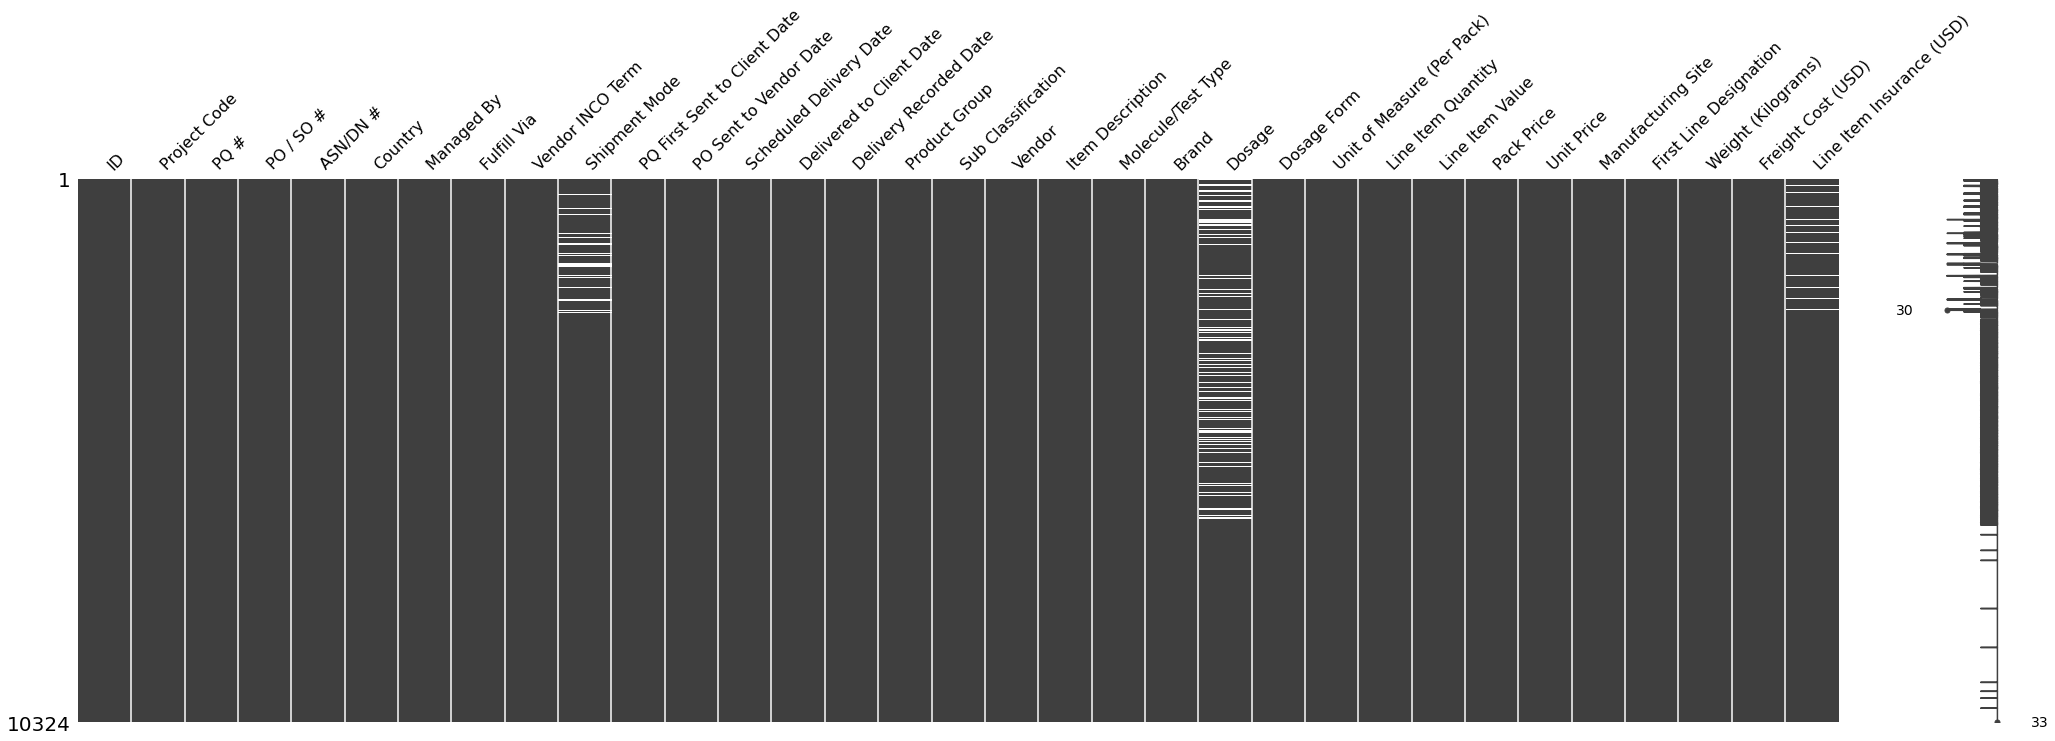

In [5]:
# plot Graphical way of missing values
missingno.matrix(df , figsize=(35 , 10));

In [6]:
# 2. Using isnull() method
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [7]:
# Check the Data Types
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


There are lot of missing values in "Shipment Mode , Dosage , Line Item Insurance (USD).

# Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models. Some may need more preprocessing than others to get ready.

In [8]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,C�te d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,C�te d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [9]:
# Total Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

## Feature :- PQ (Performance Qualification)
Description :- PQ is the final step in the qualification process.

In [10]:
print(df["PQ #"].value_counts())

Pre-PQ Process    2681
FPQ-14942          205
FPQ-12522          154
FPQ-13973          110
FPQ-4537            98
                  ... 
FPQ-4276             1
FPQ-9820             1
FPQ-12832            1
FPQ-10944            1
FPQ-11670            1
Name: PQ #, Length: 1237, dtype: int64


## Feature :- Country

Description : In which country goods are Transport for another place.

South Africa          1406
Nigeria               1194
C�te d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Pakistan                15
Guatemala               15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Togo                     3
Senegal                  3
A

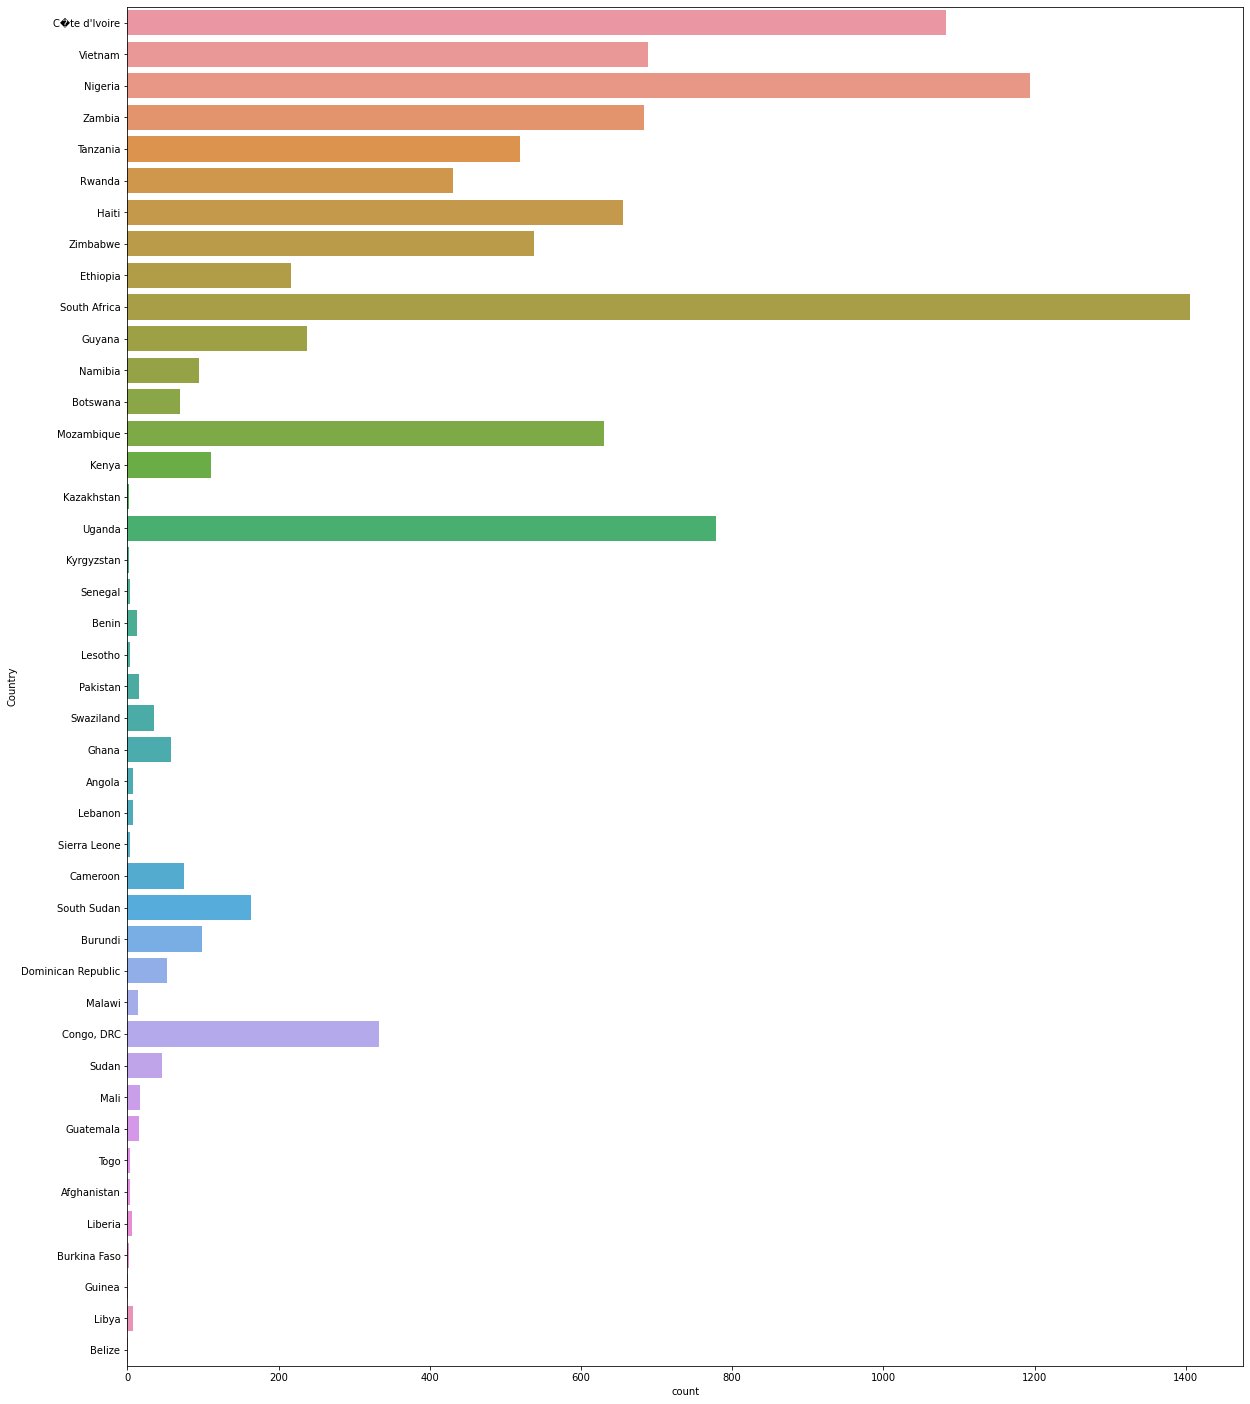

In [11]:
fig = plt.figure(figsize=(20 , 25))
sns.countplot(y = "Country" , data=df);
print(df["Country"].value_counts())


South Africa have high majority and Belize have low majority.

## Feature : FulFill Via

Description :- Show the Delievery Method and Distribution Center.

From RDC       5404
Direct Drop    4920
Name: Fulfill Via, dtype: int64


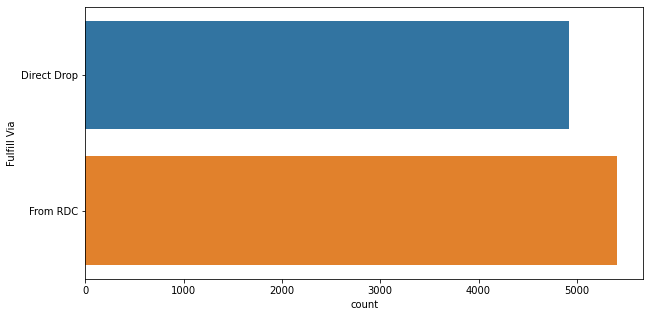

In [12]:

fig = plt.figure(figsize=(10 , 5))
sns.countplot(y = "Fulfill Via" , data=df);
print(df["Fulfill Via"].value_counts())

"From RDC" Have high majority it means Most of Goods are delivered from Distribution Center.

## Feature : Vendor INCO Term

Description :- It's a set of 11 internationally recognized rules which define the responsibilities of sellers and buyers.

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: Vendor INCO Term, dtype: int64


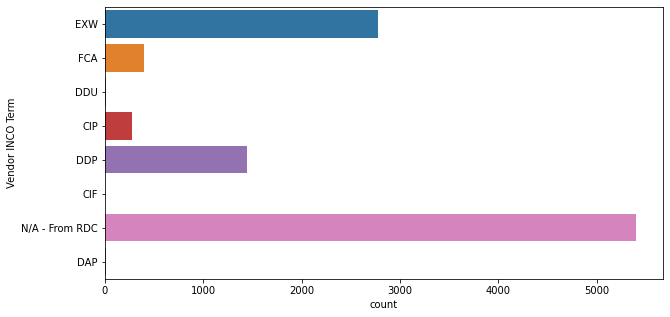

In [13]:
fig = plt.figure(figsize=(10 , 5))
sns.countplot(y = "Vendor INCO Term" , data=df);
print(df["Vendor INCO Term"].value_counts())

## Feature : Shipment Mode

Description :- Show the Shipment Mode whether which mode is helpfull for transport the goods.

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64


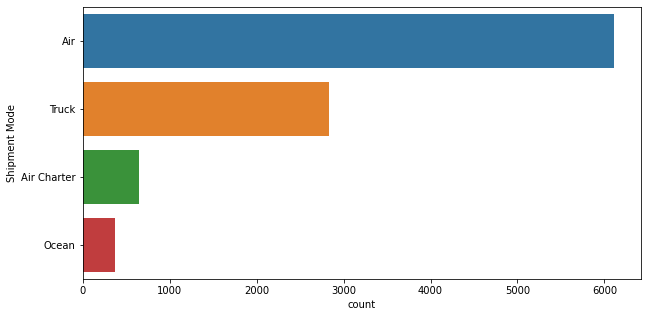

In [14]:
fig = plt.figure(figsize=(10 , 5))
sns.countplot(y = "Shipment Mode" , data=df);
print(df["Shipment Mode"].value_counts())

Mostly the goods are Shipped Via Air.

## Feature : Managed By
Description :- Show the Different Field office to handle the Goods.

PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: Managed By, dtype: int64


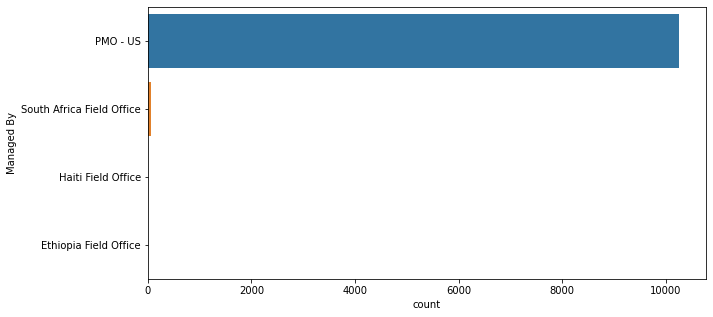

In [15]:

fig = plt.figure(figsize=(10 , 5))
sns.countplot(y = "Managed By" , data=df);
print(df["Managed By"].value_counts())

PMO - US Have High Majority.

## Feature :- Vendor
Description :- Show the Different-Different Vendors Name

SCMS from RDC                                   5404
Orgenics, Ltd                                    754
S. BUYS WHOLESALER                               715
Aurobindo Pharma Limited                         668
Trinity Biotech, Plc                             356
                                                ... 
CENTRAL PHARMACEUTICAL COMPANY NO. 1               1
SUB-SAHARAN BIOMEDICAL P.L.C.                      1
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)       1
RAININ INSTRUMENT, LLC.                            1
ACCESS BIO, INC.                                   1
Name: Vendor, Length: 73, dtype: int64


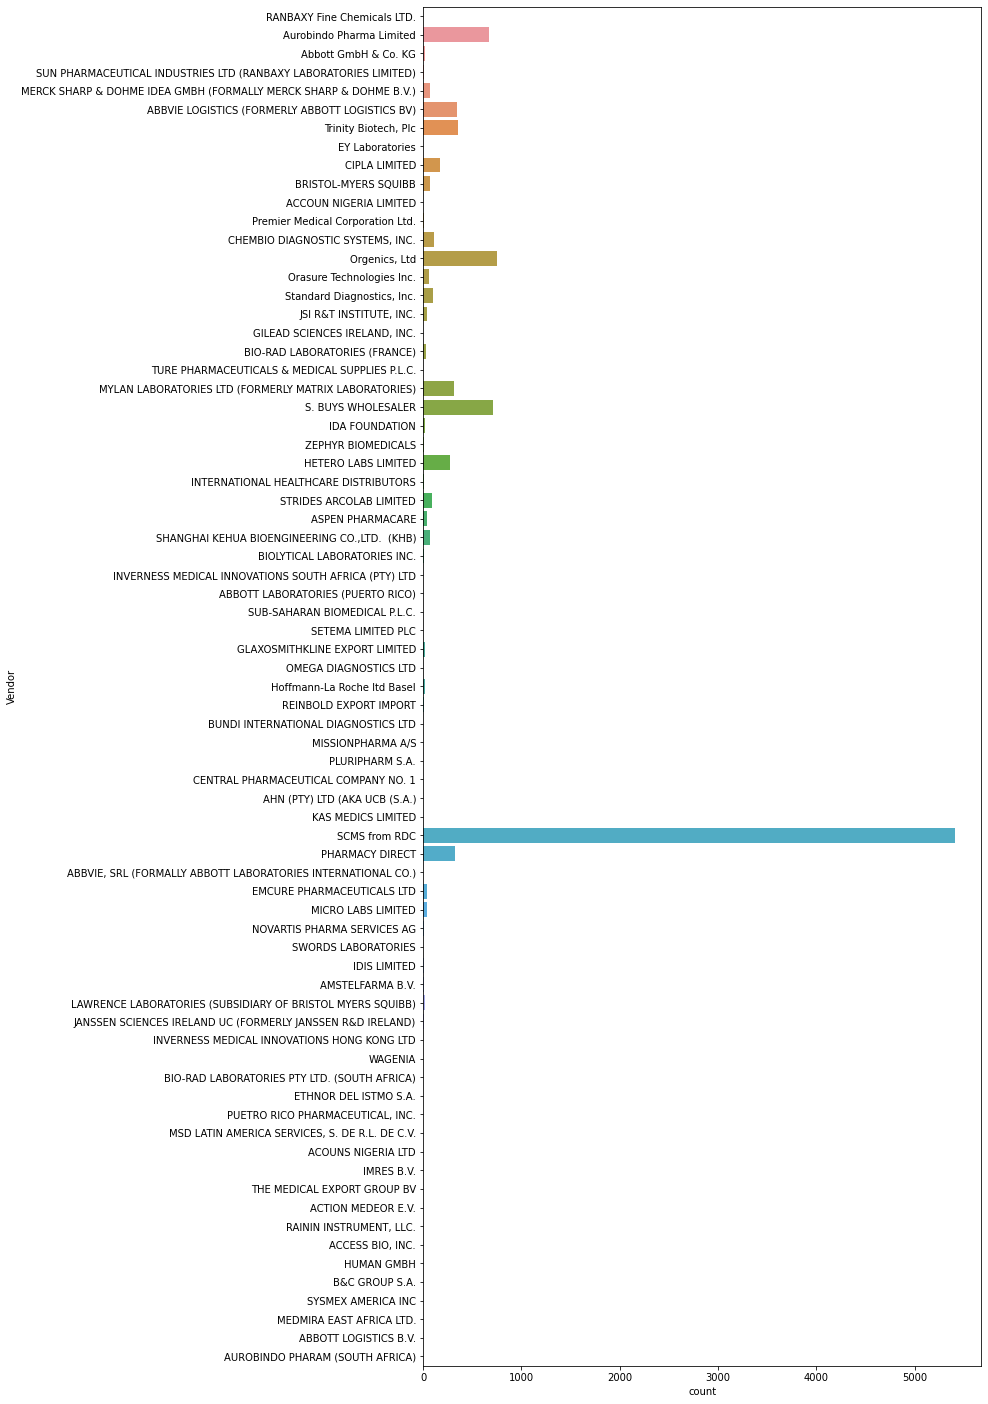

In [16]:

fig = plt.figure(figsize=(10 , 25))
sns.countplot(y = "Vendor" , data=df);
print(df["Vendor"].value_counts())

High Majority Vendor is SCMS from RDS

## Feature :- Brand
Description :- Show the Different Brand Name like Generic ex- medicine.

Generic            7285
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             165
Norvir              136
Stat-Pak            115
Bioline             113
Truvada              94
Videx                84
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Invirase             53
Viread               52
Zerit                46
Isentress            44
Epivir               42
Prezista             42
Retrovir             41
Videx EC             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Trizivir             18
Reyataz              18
Atripla              16
First Response       15
Coartem              12
Viracept             11
Paramax               5
INSTi                 5
Multispot             5
DoubleCheck           5
LAV                   4
ImmunoComb            3
Reveal                3
Hexagon         

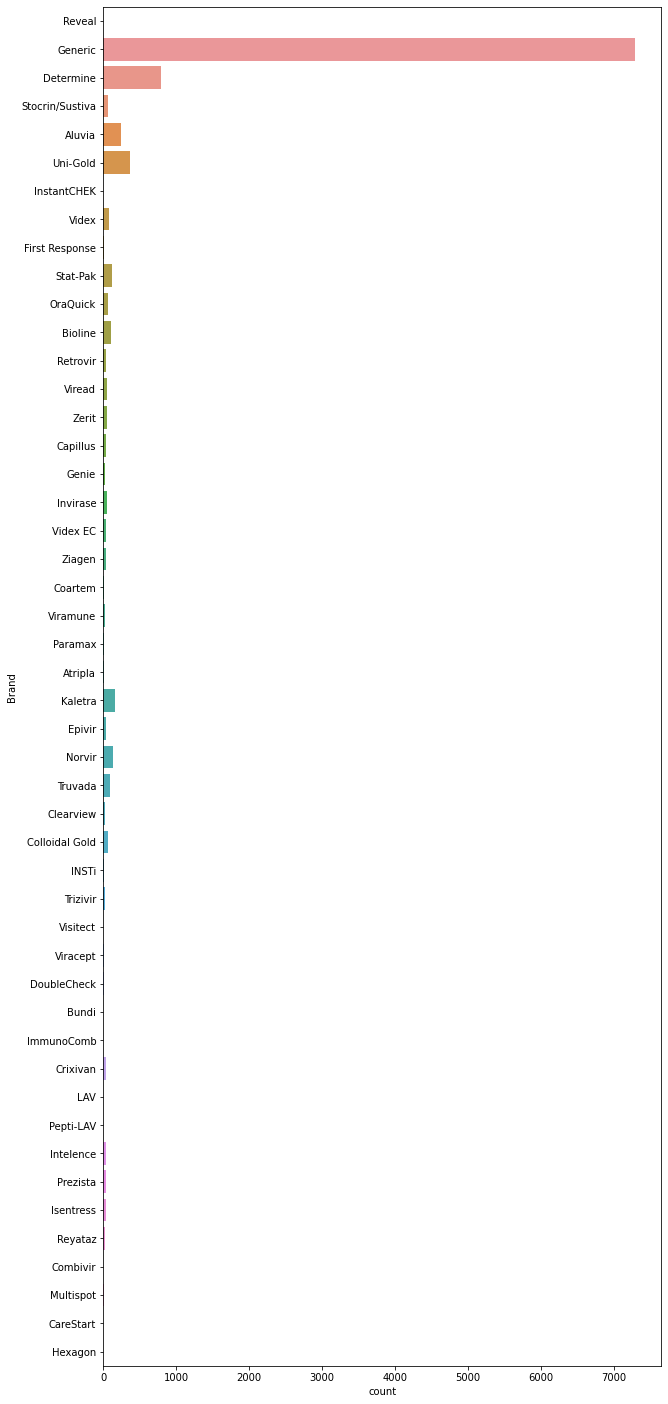

In [17]:

fig = plt.figure(figsize=(10 , 25))
sns.countplot(y = "Brand" , data=df);
print(df["Brand"].value_counts())

Mostly We have Generic Brand as compare the other Brands.

## Feature :- Manufacturing Site
Description :- Describe the Manufacturing Site in different Countries where the Goods are Manufactured.

Aurobindo Unit III, India              3172
Mylan (formerly Matrix) Nashik         1415
Hetero Unit III Hyderabad IN            869
Cipla, Goa, India                       665
Strides, Bangalore, India.              540
                                       ... 
Meditab (for Cipla) Daman IN              1
BUNDI INTERNATIONAL DIAGNOSTICS LTD       1
ABBVIE Labs North Chicago US              1
ABBSP                                     1
Access BIO, L.C.                          1
Name: Manufacturing Site, Length: 88, dtype: int64


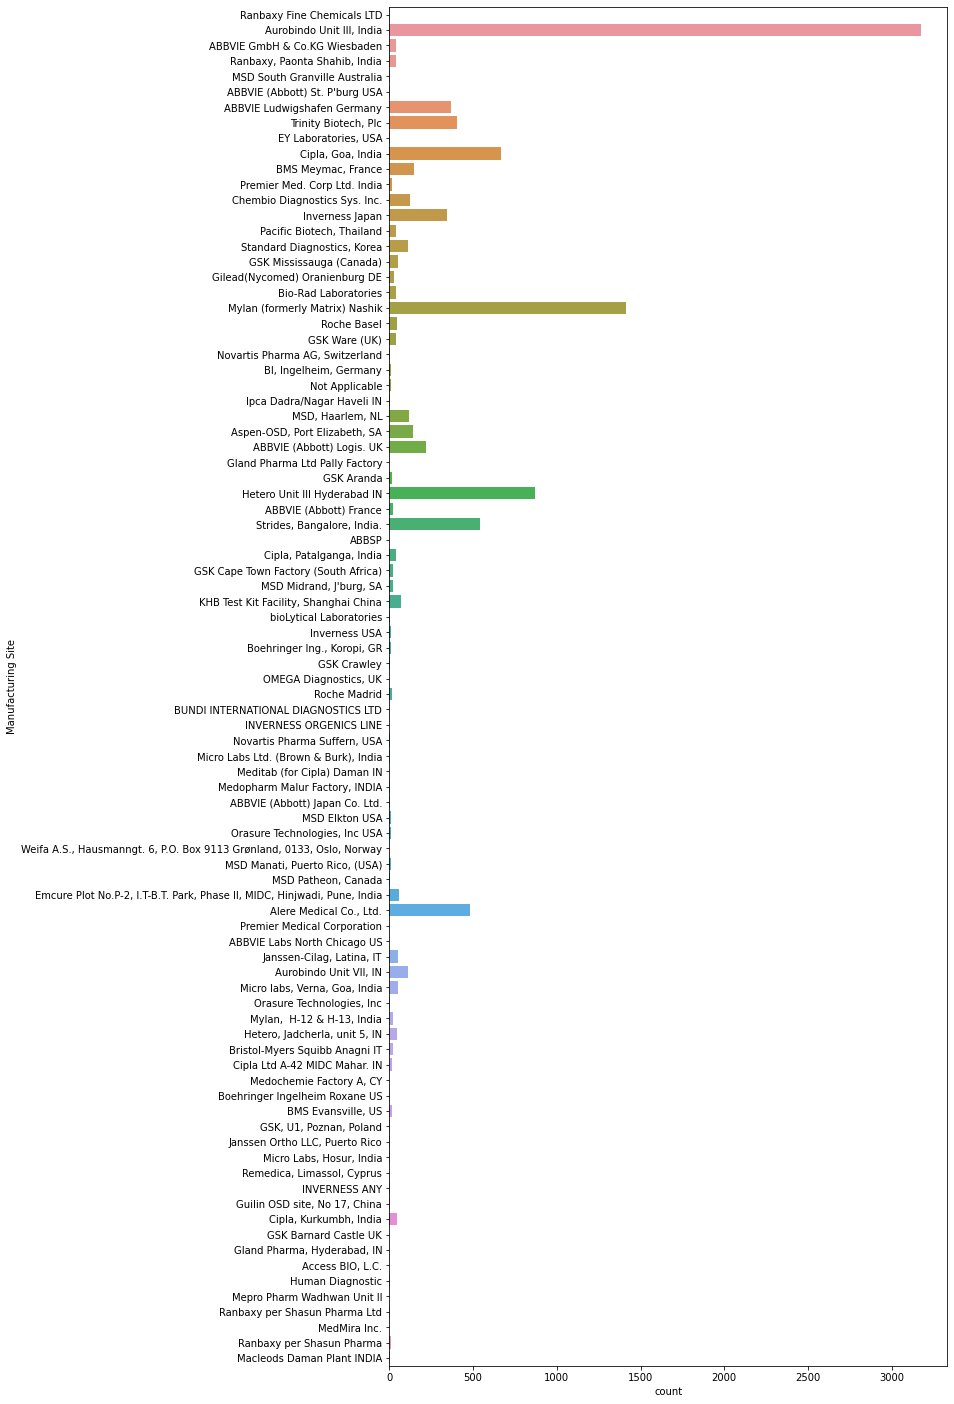

In [18]:
fig = plt.figure(figsize=(10 , 25))
sns.countplot(y = "Manufacturing Site" , data=df);
print(df["Manufacturing Site"].value_counts())

Highy Manufacturing Site is Aurobindo Unit III, India.

## Feature :- First Line Designation


Yes    7030
No     3294
Name: First Line Designation, dtype: int64


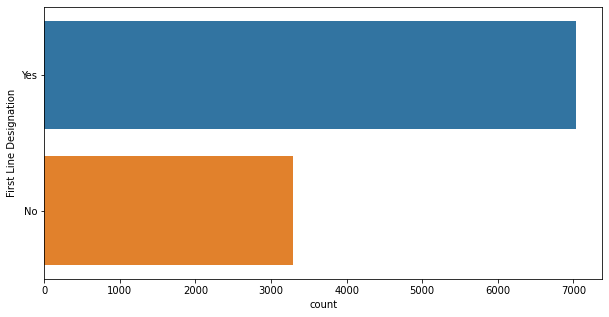

In [19]:
fig = plt.figure(figsize=(10 , 5))
sns.countplot(y = "First Line Designation" , data=df);
print(df["First Line Designation"].value_counts())

In [20]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

## Feature :- Product Group
Description :- It's just a subset of your inventory that you define, and all the products inside it use the same bid.

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64


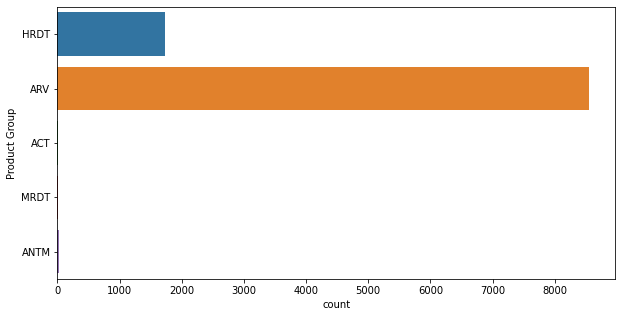

In [21]:
fig = plt.figure(figsize=(10 , 5))
sns.countplot(y = "Product Group" , data=df);
print(df["Product Group"].value_counts())

ARV Products Has a High Majority Product Group.

## Feature :- Sub Classification

Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: Sub Classification, dtype: int64


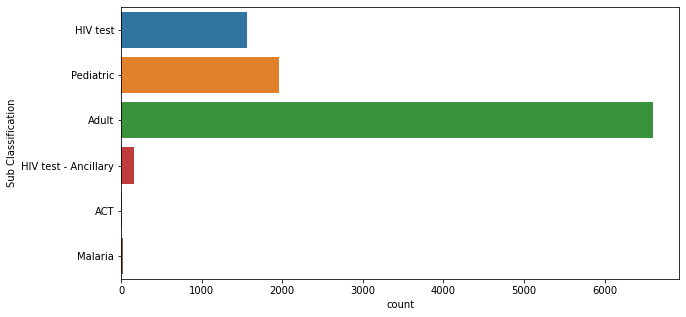

In [22]:
fig = plt.figure(figsize=(10 , 5))
sns.countplot(y = "Sub Classification" , data=df);
print(df["Sub Classification"].value_counts())

## Feature :- Dosage Form
Description :- Show the Different Forms of Medicine to take as a Dosage.

Tablet                                3532
Tablet - FDC                          2749
Test kit                              1575
Capsule                                729
Oral solution                          727
Chewable/dispersible tablet - FDC      239
Oral suspension                        214
Test kit - Ancillary                   161
Chewable/dispersible tablet            146
Delayed-release capsules               131
Delayed-release capsules - blister      41
Powder for oral solution                28
Tablet - FDC + co-blister               20
Tablet - FDC + blister                  15
Tablet - blister                        10
Injection                                6
Oral powder                              1
Name: Dosage Form, dtype: int64


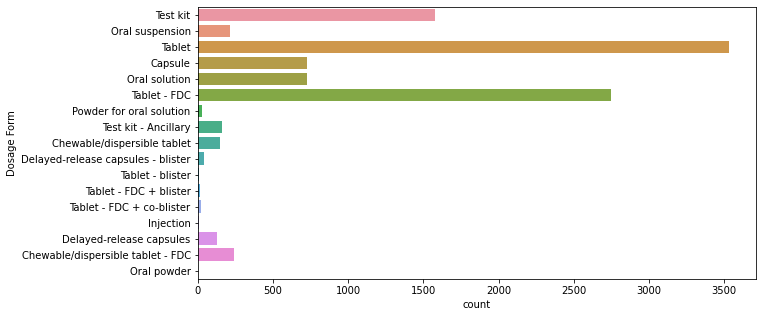

In [23]:
fig = plt.figure(figsize=(10 , 5))
sns.countplot(y = "Dosage Form" , data=df);
print(df["Dosage Form"].value_counts())

Tablet Dosage Form has High Majority Form as compare to other forms.

## Feature :- Molecule/Test Type
Description :- Show the Different-Different Type of Tests and Molecule

Efavirenz                                1125
Nevirapine                                877
Lamivudine/Nevirapine/Zidovudine          707
Lamivudine/Zidovudine                     689
Lopinavir/Ritonavir                       633
                                         ... 
Quinine                                     1
HIV 1/2, ImmunoComb II BiSpot EIA Kit       1
Lamivudine/Zidovudine+Abacavir              1
Malaria Antigen P.f Kit, 30 x 1 Test        1
Nelfinavir                                  1
Name: Molecule/Test Type, Length: 86, dtype: int64


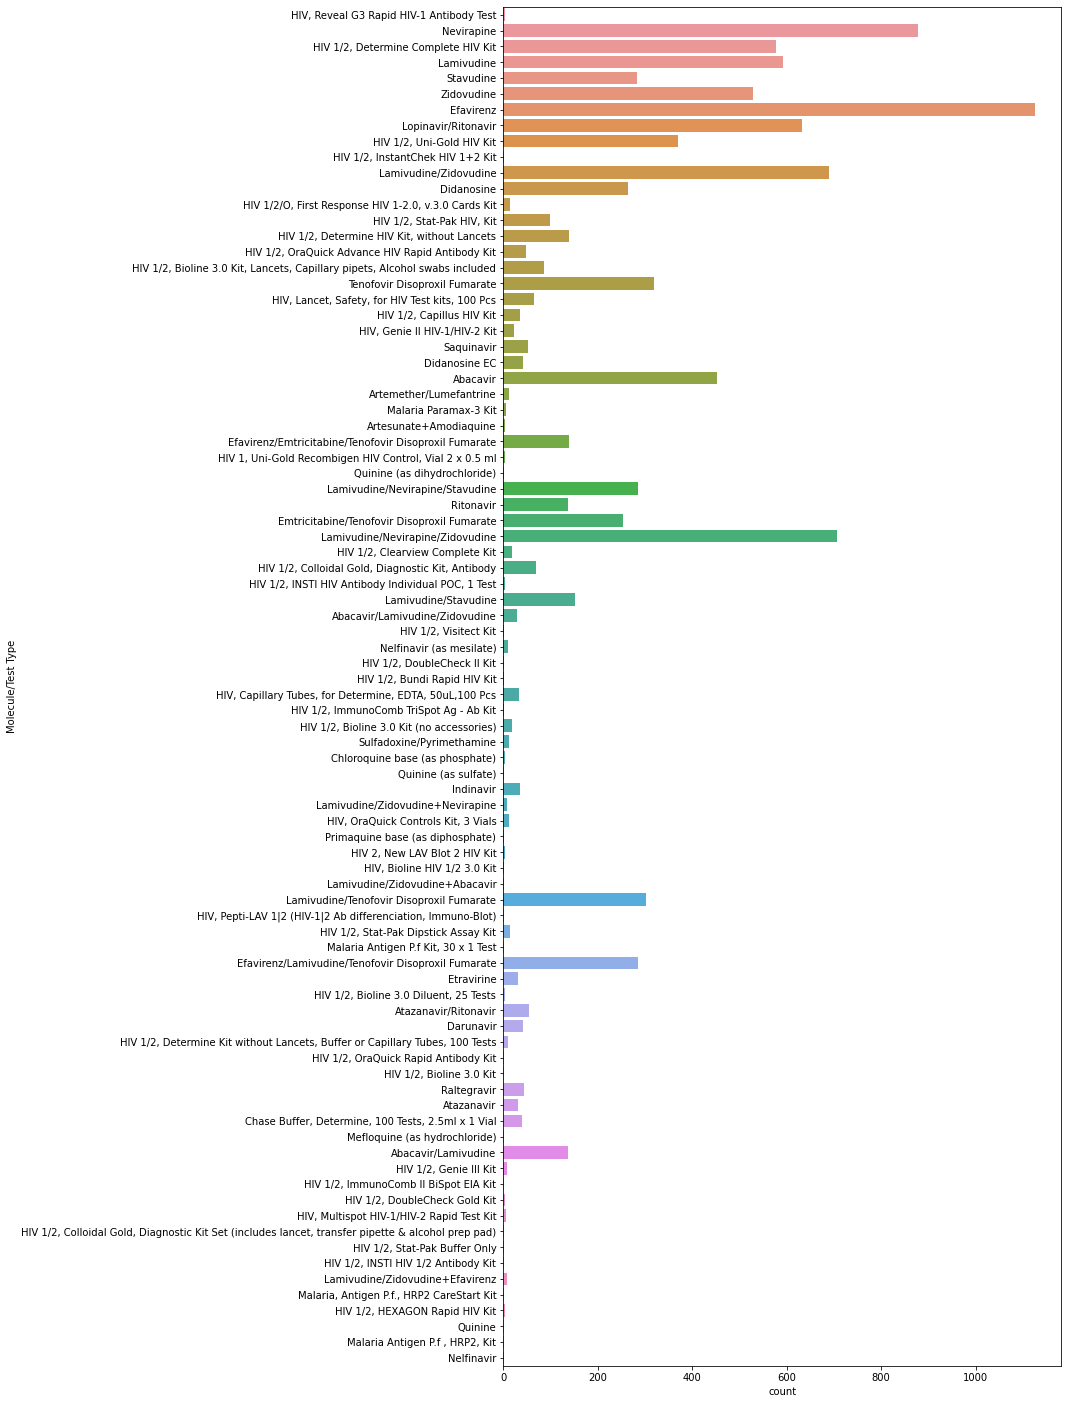

In [24]:
fig = plt.figure(figsize=(10 , 25))
sns.countplot(y = "Molecule/Test Type" , data=df);
print(df["Molecule/Test Type"].value_counts())

Efavirenz Test Type has High Majority.

## Feature :- ASN/DN (Advance ship notice)
Description :- 
Advanced shipping notice (ASN) is a document that provides detailed information about a pending delivery.

In [25]:
df["ASN/DN #"].value_counts()

ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
DN-304       17
             ..
DN-4093       1
ASN-8175      1
ASN-5053      1
DN-622        1
ASN-22886     1
Name: ASN/DN #, Length: 7030, dtype: int64

## Feature :- PO / SO

In [26]:
df["PO / SO #"].value_counts()

SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-259075    38
SCMS-215370    38
               ..
SO-40882        1
SO-48012        1
SCMS-159091     1
SCMS-149960     1
SCMS-25550      1
Name: PO / SO #, Length: 6233, dtype: int64

# Handle the Missing/Null Values

In [27]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [28]:
# Drop the Null values
df.dropna(subset=["Shipment Mode" , "Dosage" , "Line Item Insurance (USD)"] , inplace = True)

In [29]:
df.isnull().sum()

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Des

In [30]:
df.shape

(8158, 33)

In [31]:
df.to_csv("SCMS_Delivery_Dataset.csv" , index=False)

In [32]:
df1 = pd.read_csv("/home/sarthak/Documents/Logistic_industory/SCMS_Delivery_Dataset.csv")
df1.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,108,104-CI-T01,Pre-PQ Process,SCMS-698,ASN-727,C�te d'Ivoire,PMO - US,Direct Drop,CIP,Air,...,60,5513,140581.5,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93
1,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
2,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
3,161,117-ET-T01,Pre-PQ Process,SCMS-11070,ASN-916,Ethiopia,PMO - US,Direct Drop,EXW,Air,...,60,64000,99200.0,1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72
4,269,108-VN-T01,Pre-PQ Process,SCMS-14190,ASN-1192,Vietnam,PMO - US,Direct Drop,EXW,Air,...,30,1000,17000.0,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.20


In [33]:
df1.isnull().sum()

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Des

In [34]:
df["Scheduled Delivery Date"].value_counts()

29-Aug-14    96
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    58
             ..
23-Sep-13     1
9-Sep-14      1
21-May-15     1
4-Mar-14      1
4-Feb-11      1
Name: Scheduled Delivery Date, Length: 1630, dtype: int64

In [35]:
df["Country"].value_counts()

South Africa          1364
Nigeria                952
C�te d'Ivoire          827
Uganda                 724
Vietnam                661
Haiti                  549
Mozambique             506
Zimbabwe               471
Zambia                 470
Tanzania               374
Rwanda                 336
Congo, DRC             245
Guyana                 162
Ethiopia               127
Burundi                 72
Ghana                   58
Cameroon                54
South Sudan             52
Dominican Republic      37
Namibia                 30
Swaziland               21
Guatemala               15
Benin                   10
Libya                    8
Lebanon                  8
Malawi                   4
Kenya                    4
Afghanistan              3
Botswana                 3
Angola                   3
Togo                     3
Senegal                  2
Burkina Faso             2
Belize                   1
Name: Country, dtype: int64

In [36]:
df["Project Code"].value_counts()

116-ZA-T30    768
104-CI-T30    643
151-NG-T30    628
114-UG-T30    563
108-VN-T30    522
             ... 
100-BZ-T30      1
104-SZ-T30      1
A01-SN-T50      1
119-NA-T30      1
A02-SN-T50      1
Name: Project Code, Length: 90, dtype: int64

In [37]:
df["Country"].value_counts()

South Africa          1364
Nigeria                952
C�te d'Ivoire          827
Uganda                 724
Vietnam                661
Haiti                  549
Mozambique             506
Zimbabwe               471
Zambia                 470
Tanzania               374
Rwanda                 336
Congo, DRC             245
Guyana                 162
Ethiopia               127
Burundi                 72
Ghana                   58
Cameroon                54
South Sudan             52
Dominican Republic      37
Namibia                 30
Swaziland               21
Guatemala               15
Benin                   10
Libya                    8
Lebanon                  8
Malawi                   4
Kenya                    4
Afghanistan              3
Botswana                 3
Angola                   3
Togo                     3
Senegal                  2
Burkina Faso             2
Belize                   1
Name: Country, dtype: int64

In [38]:
df["Managed By"].value_counts()

PMO - US                     8101
South Africa Field Office      57
Name: Managed By, dtype: int64

In [39]:
df["Fulfill Via"].value_counts()

From RDC       4905
Direct Drop    3253
Name: Fulfill Via, dtype: int64

In [40]:
df['Vendor INCO Term'].value_counts()

N/A - From RDC    4905
DDP               1379
EXW               1241
FCA                383
CIP                237
DDU                  8
DAP                  5
Name: Vendor INCO Term, dtype: int64

In [41]:

df["Shipment Mode"].value_counts()

Air            4361
Truck          2780
Air Charter     650
Ocean           367
Name: Shipment Mode, dtype: int64

In [42]:
df["Product Group"].value_counts()

ARV     8120
ANTM      22
ACT       16
Name: Product Group, dtype: int64

In [43]:
df["Sub Classification"].value_counts()

Adult        6266
Pediatric    1854
Malaria        22
ACT            16
Name: Sub Classification, dtype: int64

In [44]:
df["Vendor"].value_counts()

SCMS from RDC                                                        4905
S. BUYS WHOLESALER                                                    707
Aurobindo Pharma Limited                                              637
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                       342
PHARMACY DIRECT                                                       326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                 317
HETERO LABS LIMITED                                                   277
CIPLA LIMITED                                                         168
STRIDES ARCOLAB LIMITED                                                90
MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.)      66
BRISTOL-MYERS SQUIBB                                                   61
EMCURE PHARMACEUTICALS LTD                                             41
ASPEN PHARMACARE                                                       40
MICRO LABS LIMITED                    

In [45]:
df["Item Description"].value_counts()

Efavirenz 600mg, tablets, 30 Tabs                                                  704
Nevirapine 200mg, tablets, 60 Tabs                                                 601
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                   577
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                  560
Lamivudine 150mg, tablets, 60 Tabs                                                 358
                                                                                  ... 
Chloroquine 150mg base (as phosphate), [DON] tablets, 1000 Tabs                      1
Nelfinavir 50mg/g [Viracept], oral powder, 144g                                      1
Quinine sulphate 300mg, film coated tablet, 1000 Tabs                                1
Efavirenz 200mg, tablets, 30 Tabs                                                    1
Lamivudine/Nevirapine/Zidovudine 30/50/60mg, [DON] dispersible tablets, 60 Tabs      1
Name: Item Description, Length: 136, dtype:

In [46]:
df["Molecule/Test Type"].value_counts()

Efavirenz                                                1048
Nevirapine                                                841
Lamivudine/Nevirapine/Zidovudine                          704
Lamivudine/Zidovudine                                     652
Lopinavir/Ritonavir                                       600
Lamivudine                                                557
Zidovudine                                                501
Abacavir                                                  415
Tenofovir Disoproxil Fumarate                             306
Lamivudine/Tenofovir Disoproxil Fumarate                  301
Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate        286
Lamivudine/Nevirapine/Stavudine                           261
Stavudine                                                 253
Didanosine                                                251
Emtricitabine/Tenofovir Disoproxil Fumarate               244
Lamivudine/Stavudine                                      149
Efaviren

In [56]:
df["Brand"].value_counts()

Generic            6931
Aluvia              231
Kaletra             151
Norvir              129
Truvada              84
Videx                75
Stocrin/Sustiva      50
Isentress            44
Prezista             42
Invirase             42
Zerit                40
Epivir               38
Viread               38
Ziagen               37
Videx EC             37
Retrovir             36
Intelence            32
Crixivan             29
Viramune             25
Reyataz              18
Atripla              16
Trizivir             15
Coartem              12
Viracept              3
Combivir              3
Name: Brand, dtype: int64

In [58]:
df["Dosage Form"].value_counts()

Tablet                                3349
Tablet - FDC                          2668
Oral solution                          674
Capsule                                650
Chewable/dispersible tablet - FDC      239
Oral suspension                        203
Chewable/dispersible tablet            138
Delayed-release capsules               131
Delayed-release capsules - blister      37
Powder for oral solution                25
Tablet - FDC + blister                  15
Tablet - FDC + co-blister               12
Tablet - blister                        10
Injection                                6
Oral powder                              1
Name: Dosage Form, dtype: int64

In [59]:
df["Unit of Measure (Per Pack)"].value_counts()

60      3928
30      2482
240      622
120      447
90       208
300      148
200       69
180       63
100       60
336       35
270       34
84        21
1000      16
540        7
720        5
5          4
168        3
24         2
12         2
160        1
144        1
Name: Unit of Measure (Per Pack), dtype: int64

In [60]:
df["Line Item Quantity"].value_counts()

20000     61
1000      57
50000     56
10000     55
3000      53
          ..
45950      1
48150      1
234519     1
3096       1
2047       1
Name: Line Item Quantity, Length: 4487, dtype: int64

In [61]:
df["Manufacturing Site"].value_counts()

Aurobindo Unit III, India                                                   2978
Mylan (formerly Matrix) Nashik                                              1407
Hetero Unit III Hyderabad IN                                                 868
Cipla, Goa, India                                                            624
Strides, Bangalore, India.                                                   528
ABBVIE Ludwigshafen Germany                                                  350
ABBVIE (Abbott) Logis. UK                                                    204
BMS Meymac, France                                                           129
Aspen-OSD, Port Elizabeth, SA                                                125
MSD, Haarlem, NL                                                             117
Aurobindo Unit VII, IN                                                       111
Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India      56
Janssen-Cilag, Latina, IT   

In [62]:
df["First Line Designation"].value_counts()

Yes    5242
No     2916
Name: First Line Designation, dtype: int64

In [63]:
df["Unit Price"]

21       0.42
22       0.01
23       0.68
29       0.03
32       0.57
         ... 
10319    0.06
10320    0.11
10321    0.33
10322    0.11
10323    0.03
Name: Unit Price, Length: 8158, dtype: float64

In [47]:
# df['Shipment Mode'].value_counts().index[0]

In [48]:

# df['Shipment Mode'].mode()[0]

In [49]:
# Create a function to handle missing  values in Categorical Features
# def impute_nan(df,variable):
#     most_frequent_category=df[variable].mode()[0]
#     df[variable].fillna(most_frequent_category,inplace=True)

In [50]:
# impute_nan(df , "Shipment Mode")

In [51]:
# Handle "Dosage" Column 
# df["Dosage"].mode()[0]

In [52]:
# impute_nan(df , "Dosage")

In [53]:
# Handle the "Line Item Insurance (USD)" Column
# df["Line Item Insurance (USD)"].mean()

In [54]:
# df["Line Item Insurance (USD)"] = df["Line Item Insurance (USD)"].fillna(df["Line Item Insurance (USD)"].mean())

In [55]:
# df.isnull().sum()

**All the Missing Values Are Handled**